In [18]:
import re
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

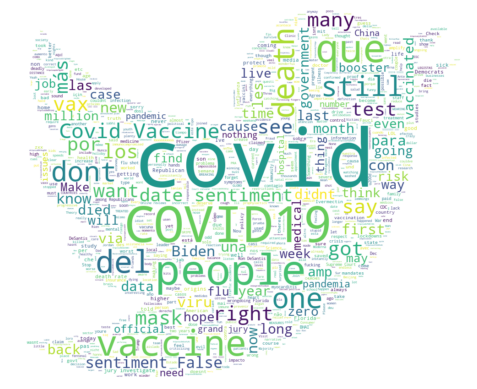

In [35]:
with open("raw_tweets.txt",encoding='utf-8') as f:
    tweet_contents = f.readlines()

# Concatenate all tweets into a single string
all_tweets = ' '.join(tweet_contents)

# Clean the text by removing mentions (@username), hashtags (#), and emojis
all_tweets = re.sub(r'@\w+', '', all_tweets)
all_tweets = re.sub(r'#\w+', '', all_tweets)
all_tweets = re.sub(r'[^\w\s]', '', all_tweets)

# Load the Twitter logo image as the mask for the word cloud
twitter_mask = np.array(Image.open("twitter_mask.png"))

STOPWORDS.update(["topic","rawtweets","content","lang","en","fr"])


# Generate the word cloud with the Twitter logo shape and light color scheme
wc = WordCloud(background_color="white", max_words=2000, mask=twitter_mask,
               stopwords=STOPWORDS, contour_color='steelblue',min_word_length=3)

wordcloud = wc.generate(all_tweets)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
